In [20]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from model_suport import load_best_score, plot_confusion_matrix_with_labels
import optuna
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Cell 2: Carregamento dos dados
data = pd.read_csv('../Data/1. Dataset Competicao.csv') 
data_test = pd.read_csv('../Data/1. Dataset Test Competicao.csv')

# Separação das features e do target
X = data.drop('Transition', axis=1)
y = data['Transition']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)

# Obtenção do melhor score anterior
best_score, _ = load_best_score()

Current Best Score Stored: 45.42528735632183867210%
Model with Best Score: RandomForestClassifier



TPE 

In [21]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 40)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    bootstrap = trial.suggest_categorical('bootstrap', [False, True])

    model1 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=34,
        bootstrap=bootstrap
    )

    scores_5 = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
    scores_10 = cross_val_score(model1, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_5 = scores_5.mean()
    accuracy_10 = scores_10.mean()

    return max(accuracy_5, accuracy_10)


In [ ]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)
print(f"Melhor acurácia: {study.best_value}")
print(f"Melhores hiperparâmetros: {study.best_params}")


[I 2024-11-13 10:20:55,691] A new study created in memory with name: no-name-b6e635be-b7bb-45b8-8388-287388054775
[I 2024-11-13 10:21:04,347] Trial 0 finished with value: 0.4527667984189724 and parameters: {'n_estimators': 156, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 39, 'min_samples_leaf': 6, 'bootstrap': False}. Best is trial 0 with value: 0.4527667984189724.
[I 2024-11-13 10:21:08,220] Trial 1 finished with value: 0.4709486166007905 and parameters: {'n_estimators': 165, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 0.4709486166007905.
[I 2024-11-13 10:21:17,928] Trial 2 finished with value: 0.4476767676767676 and parameters: {'n_estimators': 241, 'max_features': 'sqrt', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 6, 'bootstrap': False}. Best is trial 1 with value: 0.4709486166007905.
[I 2024-11-13 10:21:19,662] Trial 3 finished with value: 0.4752964426877

Melhor acurácia: 0.5025691699604743
Melhores hiperparâmetros: {'n_estimators': 175, 'max_features': 'log2', 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 11, 'bootstrap': True}


Resultados

In [23]:

# *? ###################################################################################################################################################################
# *?     ACCURACY    ##          DataSet        ##      Parametros
# *? ###################################################################################################################################################################
# *?     0.502569     ##  1. Dataset Competicao  ## {'n_estimators': 153, 'max_features': 'log2', 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 12, 'bootstrap': True}
# *?     0.49822      ##  1. Dataset Competicao  ##  {'n_estimators': 151, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True} 
# *? 

Random Forest 

In [24]:
# Cell 5: Treinamento com os melhores parâmetros encontrados
random_forest_model = RandomForestClassifier(
    n_estimators=153, max_features='log2', max_depth=15,
    min_samples_split=15, min_samples_leaf=12, bootstrap=True, random_state=34
)
random_forest_model.fit(X_train, y_train)

random_forest_cross_val_score = cross_val_score(random_forest_model, X_train, y_train, cv=10)
random_forest_cross_val_score_scoring = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Accuracy score: {random_forest_cross_val_score.mean()}")
print(f"Standard deviation: {random_forest_cross_val_score.std()}")
print(f"F1 Macro score: {random_forest_cross_val_score_scoring.mean()}")
print(f"F1 Macro score deviation: {random_forest_cross_val_score_scoring.std()}")


Accuracy score: 0.5025691699604743
Standard deviation: 0.04551508256119185
F1 Macro score: 0.3878814048301866
F1 Macro score deviation: 0.019952318940130533


Matrix Confusao 

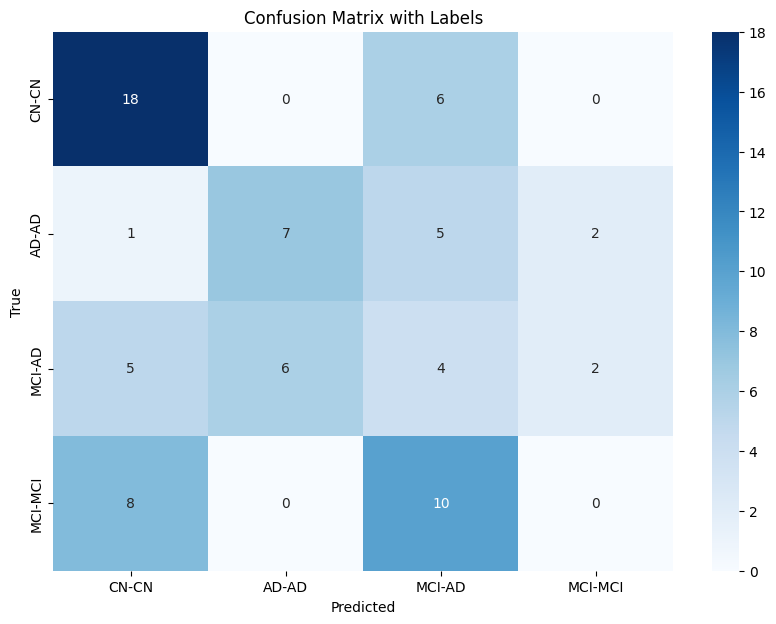

In [25]:
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3
}

# Predição e plot da matriz de confusão
y_pred = random_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix_with_labels(cm)


In [26]:
# *? ######################## 
